Installing required packages (execute all code):

In [1]:
!pip install -q google_play_scraper
!pip install -q transformers
!pip install -q plotly-express
!pip install -q num2words
!pip install -q demoji
!pip install -q unidecode
!pip install -q vaderSentiment
from num2words import num2words
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Arjun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#TASK 1: GATHERING REVIEWS

**SUD:** https://play.google.com/store/apps/details?id=com.enjoyingfoss.parlera&hl=en_CA&gl=US

**Heads Up!**:
Competitor
https://play.google.com/store/apps/details?id=com.wb.headsup

**GuessUp - Word Party Charades**:
Competitor
https://play.google.com/store/apps/details?id=pt.cosmicode.guessup&hl=en

**Guess! Charades Party Game**:
Similar
https://play.google.com/store/apps/details?id=com.boinkiieee.charades

**Guess What: Just One Word**:
Similar
https://play.google.com/store/apps/details?id=com.siwalusoftware.guesswhat&hl=en



The notebook contains the review content, score, appID, and userName, in that order. The names of the csv files are appended with the package name of the app it is for.

In [2]:
from google_play_scraper import app, Sort, reviews_all, reviews
import plotly.express as px
import pandas as pd
import numpy as np
from google_play_scraper import Sort, reviews_all
from tqdm import tqdm
import re
import demoji
from gensim.parsing.preprocessing import remove_stopwords
from unidecode import unidecode

app_reviews = []
app_packages = [
  'com.enjoyingfoss.parlera',
  'com.wb.headsup',
  'pt.cosmicode.guessup',
  'com.boinkiieee.charades',
  'com.siwalusoftware.guesswhat'
]
count = 0

for app_package in tqdm(app_packages):

  # for sort_order in [Sort.MOST_RELEVANT]:
    rvs, _ = reviews(
      app_package,
      lang='en',
      country='us',
      sort=Sort.MOST_RELEVANT,
      count= 1000,
      filter_score_with=None
    )

    for r in rvs:
      r['sortOrder'] = 'most_relevant'
      r['appId'] = app_package

    app_reviews.extend(rvs)
    app_reviews_df = pd.DataFrame(app_reviews)
    # getting all the columns
    my_cols = set(app_reviews_df.columns)

  # removing the desired column
    my_cols.remove('reviewId')
    my_cols.remove('repliedAt')
    my_cols.remove('replyContent')
    my_cols.remove('sortOrder')
    my_cols.remove('thumbsUpCount')
    my_cols.remove('reviewCreatedVersion')
    my_cols.remove('userImage')
    my_cols.remove('at')
    my_cols = list(my_cols)
    app_reviews_df = app_reviews_df[my_cols]
    # <Package name, Reviewer name, Review,Rating>
    app_reviews_df = app_reviews_df.rename(columns={'appId': 'Package name', 'content': 'Review', 'score': 'Rating', 'userName': 'Reviewer name'})

    app_reviews_df = app_reviews_df[['Package name', 'Reviewer name', 'Review', 'Rating']]

    app_reviews_df.to_csv('reviews_for_'+ r['appId'] +'.csv', index=None, header=True)
    app_reviews.clear()
    count+=1

100%|██████████| 5/5 [00:04<00:00,  1.01it/s]


#TASK 2: PREPROCESS YOUR TEXT

In [3]:
def convert_numbers(text):
    # Find all numbers in the text
    numbers = re.findall(r'\d+', text)

    # Replace each number with its full form
    for number in numbers:
        full_form = num2words(int(number))
        text = text.replace(number, full_form)

    return text

In [4]:
def lemmatizer(text):
    lemm_txt = [lemmatizer.lemmatize(word) for word in text]
    return lemm_txt

In [5]:
#library that contains punctuation
import string
string.punctuation
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text


## Output 15 sample pre-processed reviews in your notebook:


In [6]:
from google_play_scraper import app, Sort, reviews_all, reviews
import plotly.express as px
import pandas as pd
import numpy as np
from tqdm import tqdm
import re
import demoji
from gensim.parsing.preprocessing import remove_stopwords
from unidecode import unidecode

def preprocess_text(text):
    if text is None:
      return []
    text = remove_punctuation(text)
    text = demoji.replace(text, '')
    text = unidecode(text)
    text = convert_numbers(text)
    text= text.strip()
    text = text.lower()
    text = remove_stopwords(text)
    lemmatizer = WordNetLemmatizer()
    text = lemmatizer.lemmatize(text)
    return text

# Preprocess the reviews
# review_tokens = [preprocess_text(review['content']) for review in reviews]
app = 'com.wb.headsup'
rvs, _ = reviews(
  app,
  lang='en',
  country='us',
  sort=Sort.MOST_RELEVANT,
  count= 15,
  filter_score_with=None
)

app_reviews = []

for r in rvs:
  r['content'] = preprocess_text(r['content'])
  r['appId'] = app

app_reviews.extend(rvs)
app_reviews_df = pd.DataFrame(app_reviews)
# getting all the columns
my_cols = set(app_reviews_df.columns)

# removing the desired column
my_cols.remove('reviewId')
my_cols.remove('repliedAt')
my_cols.remove('replyContent')
my_cols.remove('thumbsUpCount')
my_cols.remove('reviewCreatedVersion')
my_cols.remove('userImage')
my_cols.remove('at')
my_cols = list(my_cols)
app_reviews_df = app_reviews_df[my_cols]
app_reviews_df = app_reviews_df.rename(columns={'appId': 'Package name', 'content': 'Review', 'score': 'Rating', 'userName': 'Reviewer name'})
app_reviews_df = app_reviews_df[['Package name', 'Reviewer name', 'Review', 'Rating']]

display(app_reviews_df)

,Package name,Reviewer name,Review,Rating
0,com.wb.headsup,Nick B,game amazing home page terrible good expansion...,2
1,com.wb.headsup,Michael Bauman,newest patches game responsive playable stars ...,4
2,com.wb.headsup,Amy Anderson,app start sits heads screen loading ring fille...,1
3,com.wb.headsup,Dawneisha Hill,game phone years awesome downloaded working fa...,1
4,com.wb.headsup,Tikka Kids,played friends iphone lot fun got android time...,1
5,com.wb.headsup,A Google user,great game especially groups problem controls ...,3
6,com.wb.headsup,A Google user,game fine theyve taken old concept game like c...,1
7,com.wb.headsup,A Google user,happened game phones worked issues wont load l...,1
8,com.wb.headsup,Andrew MacLaine,fun people awesome silly group crashing review...,5
9,com.wb.headsup,A Google user,previous phone samsung galaxy new phone pixel ...,1


# TASK 3: SENTIMENT ANALYSIS

In [7]:
from textblob import TextBlob

app_id = 'pt.cosmicode.guessup'
reviews = reviews_all(app_id, sort=Sort.MOST_RELEVANT, count=250)
review_data_textblob = []

for review in reviews:
    text = preprocess_text(review['content'])
    blob = TextBlob(text)
    polarity_score = blob.sentiment.polarity
    review_data_textblob.append({'App’s package name': app_id, 'Review': text, 'Polarity': polarity_score})


df = pd.DataFrame(review_data_textblob, columns=['App’s package name', 'Review', 'Polarity'])
display(df)

ModuleNotFoundError: No module named 'textblob'

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Create an instance of the Vader sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Create an empty list to store the review data
review_data_vader = []

# Loop through the reviews and apply sentiment analysis using Vader
for review in reviews:
    text = preprocess_text(review['content'])
    sentiment_scores = analyzer.polarity_scores(text)
    polarity_score = sentiment_scores['compound']
    review_data_vader.append({'App’s package name': app_id, 'Review': text, 'Polarity': polarity_score})

# Create a DataFrame from the review data
df = pd.DataFrame(review_data_vader, columns=['App’s package name', 'Review', 'Polarity'])
display(df)

,App’s package name,Review,Polarity
0,pt.cosmicode.guessup,paid thirty minutes dont extra categories ive ...,0.0000
1,pt.cosmicode.guessup,kids love game played bar friends brought home...,0.9804
2,pt.cosmicode.guessup,amazing love barely ads family love playing ga...,0.9721
3,pt.cosmicode.guessup,paid decks shows obnoxious video ads rounds id...,0.7964
4,pt.cosmicode.guessup,purchased adult themed pack download buy says ...,0.3400
...,...,...,...
471,pt.cosmicode.guessup,w,0.0000
472,pt.cosmicode.guessup,wow,0.5859
473,pt.cosmicode.guessup,daebak,0.0000
474,pt.cosmicode.guessup,,0.0000


# How does the sentiments retrieved by Textblob and Vader compare with each other? How do you interpret the similarity/difference? Which one is the best option for review analysis of your apps? Why?

Below is a plot of the Sentiment scores for each of the vader and textblob outputs, the x axis is the review index. The red X's mark the value for the difference in the polarity scores: Vader - Textblob. All 450 reviews were used.

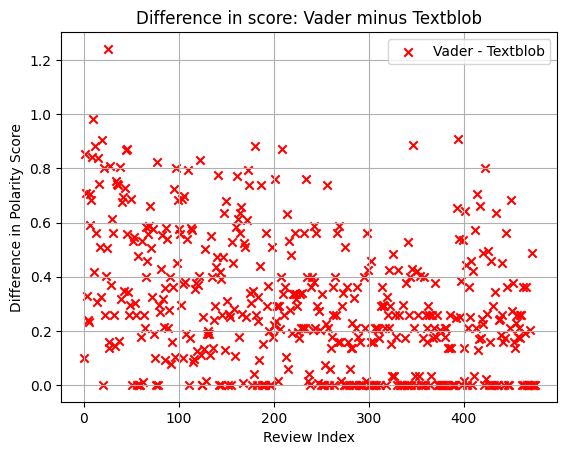

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

polarity_scores_v = [review['Polarity'] for review in review_data_vader]
polarity_scores_txt = [review['Polarity'] for review in review_data_textblob]

# Compute difference between Vader and Textblob scores
score_diffs = [np.abs(polarity_scores_v[i] - polarity_scores_txt[i]) for i in range(len(polarity_scores_v))]

# Create scatter plot with score differences
plt.scatter(range(len(score_diffs)), score_diffs, c='r', marker='x', label='Vader - Textblob')


plt.xlabel('Review Index')
plt.ylabel('Difference in Polarity Score')
plt.title('Difference in score: Vader minus Textblob')
plt.legend()
plt.grid()
plt.show()

From the graph above we can see that the difference in polarity score is typically 0.6 or below, with a maximum difference being 2.0, and minimum difference being 0 which indicates no difference at all. A difference of 0.6 or below is relatively low and indicates that there is not a stark difference between the Vader and Textblob sentiment scores.

In [ ]:
# Calculate correlation coefficient
corr_coef = np.corrcoef(polarity_scores_v, polarity_scores_txt)[0, 1]

# Print correlation coefficient
print('Correlation Coefficient:', corr_coef)

Correlation Coefficient: 0.6430737647486677


The correlation coefficient is 0.653 which indicates a moderatley strong correlation. The range of the correlation coeficient is between -1 to +1, and values closer to +1 indicating a strong positive correlation, therfore 0.653 shows relatively storng correlation between the scores of vader and Textblob.

Vader is focused on social media -- it uses emojies, puncutatuion such as exclamation marks to determine sentiment. In this way, Vader is not as usefuel since in our analysis we remove all emojies and punctuation. Vader also puts emphasis on the case of the lettering, and uppercase words have greater sentiment than lower case. In our analysis we make all words lowercase, so this aspect of Vader is not as useful to us in the way we cleaned the text.

However, TextBlob usually produces more extreme values -- values closer to either -1 or + 1. This is because it assigns a sentiment polarity score to each word in the text and then aggregates them to obtain the overall sentiment score. Vader put more emphasis on the precense of negation words, and intensifiers.

source: https://pub.towardsai.net/textblob-vs-vader-for-sentiment-analysis-using-python-76883d40f9ae

**Below is a code that shows how changes in punctutation/emojis/capitilization change score in Vader sentiment:**

In [ ]:
print("===========================\nVader Analysis:\n")
#Below are print statements of Vader sentiments when exclamationd is added/removed and emojies and uppercase to lowercase
print("No modifications:", analyzer.polarity_scores("This is an amazing app")['compound'])
print("Only exclamation:", analyzer.polarity_scores("This is an amazing app!")['compound'])
print("Uppercase and exclamation:", analyzer.polarity_scores("This is an AMAZING app!")['compound'])
print("emoji:", analyzer.polarity_scores("This is an amazing app 😁")['compound'])

print("\n===========================\nTextBlob Analysis:\n")
print("No modifications:", TextBlob("This is an amazing app").sentiment.polarity)
print("Only exclamation:", TextBlob("This is an amazing app!").sentiment.polarity)
print("Uppercase and exclamation:", TextBlob("This is an AMAZING app!").sentiment.polarity)
print("emoji:", TextBlob("This is an amazing app 😁").sentiment.polarity)



Vader Analysis:

No modifications: 0.5859
Only exclamation: 0.6239
Uppercase and exclamation: 0.7027
emoji: 0.7783

TextBlob Analysis:

No modifications: 0.6000000000000001
Only exclamation: 0.7500000000000001
Uppercase and exclamation: 0.7500000000000001
emoji: 0.6000000000000001


Given what we know from the way Vader functions and the results shown in the code above, Vader is the better choice. The main reason why it is better is because Vader uses factors that could be important for our use such as emojis and wether the letters are lower or uppercase. For this assignment, we cleaned the text in such a way as to remove the punctuation, emojies and uppercases -- but these are all present in the Google reviews and can indicate sentiment. Also, since Vader is typically used for social media apps and used for informal language, it can be useful for Google reviews where the language is typically like that.

# TASK 4: TOPIC MODELING Using LDA

In [ ]:
import pandas as pd
from google_play_scraper import Sort, reviews_all
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
import spacy

app_id = 'com.wb.headsup'

# Set the number of reviews you want to extract
num_reviews = 1000

# Use the reviews_all() function to extract the reviews
reviews = reviews_all(app_id, sort=Sort.MOST_RELEVANT, count=num_reviews)

def preprocess_text2(text):
    if text is None:
      return []
    text = remove_punctuation(text)
    text = demoji.replace(text, '')
    text = unidecode(text)
    text = convert_numbers(text)
    text= text.strip()
    text = text.lower()
    text = remove_stopwords(text)
    lemmatizer = WordNetLemmatizer()
    text = lemmatizer.lemmatize(text)
    tokens = text.split()
    # # Remove stopwords
    # tokens = [t for t in tokens if t not in stopwords]
    return tokens

# Preprocess the reviews
review_tokens = [preprocess_text2(review['content']) for review in reviews]

# Create a dictionary from the tokens
dictionary = Dictionary(review_tokens)

# Create a bag-of-words corpus from the dictionary
corpus = [dictionary.doc2bow(tokens) for tokens in review_tokens]

# Train the LDA model on the corpus
num_topics = 10
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10)

# Print the topics
for i, topic in lda_model.show_topics(num_topics=num_topics, num_words=14, formatted=False):
    print('Topic {}: {}'.format(i+1, [word for word, _ in topic]))

Topic 1: ['wont', 'download', 'load', 'let', 'install', 'game', 'open', 'hi', 'play', 'loading', 'ur', 'app', 'start', 'n']
Topic 2: ['ok', 'decks', 'deck', 'game', 'stars', 'new', 'boring', 'star', 'stupid', 'things', 'got', 'interesting', 'paid', 'cards']
Topic 3: ['work', 'app', 'phone', 'doesnt', 'head', 'game', 'tried', 'd', 'play', 'works', 'fix', 'says', 'didnt', 'times']
Topic 4: ['fun', 'game', 'good', 'play', 'family', 'friends', 'best', 'amazing', 'great', 'nice', 'played', 'time', 'funny', 'super']
Topic 5: ['time', 'takes', 'game', 'load', 'long', 'play', 'try', 'download', 'app', 'forever', 'crashes', 'addictive', 'idk', 'took']
Topic 6: ['love', 'game', 'ellen', 'loved', 'playing', 'thanks', 'thank', 'sensor', 'yes', 'absolutely', 'stop', 'challenging', 'addicting', 'sooo']
Topic 7: ['cool', 'pass', 'game', 'keeps', 'correct', 'working', 'slow', 'saying', 'fix', 'says', 'crashing', 'right', 'kept', 'tilt']
Topic 8: ['u', 'free', 'games', 'decks', 'pay', 'categories', 'ne

There are some commonalities in the words that are in the same topic: game, play; awesome, amazing; family, friends; decks, categories

### III. How do these review topics (i.e. summarized user feedback) compare to the software feature clusters you extracted in Assignment 1?



Some of the feature clusters do match with the topics listed above. Some of the feature clusters are:
* The system shall allow for one of more person to play the game **(Matches with topics: family, friends, parties)**
* The system shall present a number of categories before statrting their game **(Matches with topics: categories, deck)**
* The system will allow for motion of the device to indicate a correct or incorrect guess **(sensor, forehead)**




### IV. How do you explain the differences in terms of accuracy of the model and the size of data?



The data we are using is from HeadsUp, which is the competitor to my SUD, so there are some topics that will not be relevant to my SUD's feature clusters. But a main reason as to why the topics do not reflect some of the feature clusters is because some of the features are so obvious to be included in the app that they are not mentioned in the reviews as a result. For example, one of the feature clusters I identified is that there are multiple language options. But this is never mentioned in the reviews because it is almost always expected to be included in a mainstream app.


### V. Does any of the topics relate to the core functionalities you identified? Why?

Some of the core functionalities are reflected in the topics such as the multiplayer feature of being able to play with family and friends. The aspect of being able to choose categories from decks is also present. Another core feature is being able to set the time of a round and I noticed this is mentioned in the topics as "time" or "round". Many of the topics do not relate to features or core functionalities however, many are just characteristics such as: amazing, fun, awesome. I think this is because the model is not trained on focusing on features, instead of looking at other unrelated words. Another reason could be that the data does not reflect core functionalities -- perhaps the sample size should be raised or other sources can be used. There are also some core functionalities that I may have missed in identifying in the previous assignments, for example I did not include the aspect of the sensor or motion detection as a core functionality but with it being mentioned as often as it is -- it should be a core functionality. Also internet capability is something that is a topic and I notice now should be a core functionality.


# TASK 5: RECOMMENDATION

This is a code to see the top 100 negative reviews (lowest sentiment) so that I can determine what features people are asking for.

In [ ]:
sorted_reviews = sorted(review_data_vader, key=lambda k: k['Polarity'])
top_20_reviews = sorted_reviews[:100]
df = pd.DataFrame(top_20_reviews, columns=['App’s package name', 'Review', 'Polarity'])
display(df)

,App’s package name,Review,Polarity
0,pt.cosmicode.guessup,app worked fine extremely difficult unsubscrib...,-0.7713
1,pt.cosmicode.guessup,fun decent game timer ridiculous hate pauses a...,-0.7415
2,pt.cosmicode.guessup,im sorry boring answers wrong correct christma...,-0.6808
3,pt.cosmicode.guessup,hate,-0.5719
4,pt.cosmicode.guessup,hate,-0.5719
...,...,...,...
95,pt.cosmicode.guessup,aone supper,0.0000
96,pt.cosmicode.guessup,meus amigos quebraram minha perna tentando des...,0.0000
97,pt.cosmicode.guessup,la verdad tuve muchos problemas por que decia ...,0.0000
98,pt.cosmicode.guessup,tienes peliculas que son tan populareslo mismo...,0.0000


## I. Recommend two new features or enhancements (could be bug reports) for the app based on your above analysis that have not been done in the project.



I would reccomend adding additional language and accesibility options. One example is a Germa nalbgauge option as per the reviews, and also to add more decks/categories that are related to foreign countries. Many categories are only for North America.

Another recommendation is to add an update to fix the motion detecion on the tilting of the device in roder to recognize the correct/incorrect option better.

## II. How do you compare these recommendations, with the recommendations you provided based on persona analysis in Assignment 2? Explain similarities and differences.

The first recommendation is identical to what I had for my second person in assignment 2. As mentioned in my assignment 2 I said: "It would be important to have categories that apply to multiple countries and backgrounds. This would allow for people across the world to not feel they cannot use the game because there are no categories that reference things that they know ''. This is because many users are not only American. This is closely linked to my above recommendation of adding more language features and accessibility.

As for my other recommendation, I did not discover it in my assignment 2. I did not see that there was a bug in regard to motion detection, nor did I see any bugs at all during assignment 2. The recommendation I had described in Assignment 2 was being able to add more categories and more social features, but this is more minor compared to the number of reviews talking about bugs in motion detection.
